In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Clean prediction data

### Drop irrelevant data and rename columns

In [582]:
pred = pd.read_csv('../week_03/data/prediction.csv', header=[1])
pred

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,総数,0～4歳,5～9歳,10～14歳,15～19歳,...,45～49歳.2,50～54歳.2,55～59歳.2,60～64歳.2,65～69歳.2,70～74歳.2,75～79歳.2,80～84歳.2,85～89歳.2,90歳以上.2
0,1000,a,北海道,NaN,2015年,5381733,186275,202560,220346,239838,...,182155,180830,179163,217945,242222,191685,169245,143464,98981,65661
1,1000,a,北海道,NaN,2020年,5216615,171236,187241,203081,217852,...,197176,181353,179128,176618,213099,233802,181174,152816,117180,89016
2,1000,a,北海道,NaN,2025年,5016554,150977,172531,188169,200850,...,169721,196455,180071,177202,173146,206125,222379,165270,127014,113032
3,1000,a,北海道,NaN,2030年,4791592,139491,152274,173542,186685,...,145317,169281,195237,178565,174024,167963,196489,204906,139441,132313
4,1000,a,北海道,NaN,2035年,4546357,129292,140762,153328,172366,...,123382,145090,168342,193780,175738,169135,160816,181403,175799,152439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,47382,3,沖縄県,与那国町,2025年,1824,49,52,57,13,...,31,34,39,42,44,60,34,15,17,14
12995,47382,3,沖縄県,与那国町,2030年,1718,45,45,45,13,...,31,31,34,38,40,41,51,28,9,14
12996,47382,3,沖縄県,与那国町,2035年,1621,41,41,39,10,...,30,31,31,32,36,37,34,43,18,10
12997,47382,3,沖縄県,与那国町,2040年,1524,37,38,36,9,...,19,30,31,30,31,33,31,29,28,13


In [583]:
pred = pred[pred['Unnamed: 1']=='a']
pred.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_99709/2553021737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)


In [584]:
cols = list(pred.columns)
newcols = []
for col in cols:
    if col == 'Unnamed: 0':
        newcols.append('code')
    elif col == 'Unnamed: 2':
        newcols.append('Prefecture')
    elif col == 'Unnamed: 4':
        newcols.append('Year')
    else:
        c = col
        c = c.replace('.1', '_men')
        c = c.replace('.2', '_women')
        c = c.replace('総数', 'agetotal')
        c = c.replace('～', '-')
        c = c.replace('歳', '')
        c = c.replace('以上', 'above')
        newcols.append(c)
pred.columns = newcols
pred.columns

Index(['code', 'Prefecture', 'Year', 'agetotal', '0-4', '5-9', '10-14',
       '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90above', 'agetotal_men', '0-4_men', '5-9_men', '10-14_men',
       '15-19_men', '20-24_men', '25-29_men', '30-34_men', '35-39_men',
       '40-44_men', '45-49_men', '50-54_men', '55-59_men', '60-64_men',
       '65-69_men', '70-74_men', '75-79_men', '80-84_men', '85-89_men',
       '90above_men', 'agetotal_women', '0-4_women', '5-9_women',
       '10-14_women', '15-19_women', '20-24_women', '25-29_women',
       '30-34_women', '35-39_women', '40-44_women', '45-49_women',
       '50-54_women', '55-59_women', '60-64_women', '65-69_women',
       '70-74_women', '75-79_women', '80-84_women', '85-89_women',
       '90above_women'],
      dtype='object')

In [585]:
pred['Year'] = pred['Year'].str.replace('年', '')

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_99709/2496312231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['Year'] = pred['Year'].str.replace('年', '')


In [586]:
pred['code'] = pred['code'].astype(str).str.slice(0, -3)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_99709/3468651731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['code'] = pred['code'].astype(str).str.slice(0, -3)


### Translation to English

In [587]:
translate = pd.read_csv('../week_03/collected/translate.csv')
translate

,Japanese,English
0,北海道,Hokkaido
1,青森県,Aomori
2,岩手県,Iwate
3,宮城県,Miyagi
4,秋田県,Akita
5,山形県,Yamagata
6,福島県,Fukushima
7,茨城県,Ibaraki
8,栃木県,Tochigi
9,群馬県,Gunma


In [588]:
pred = pred.merge(translate, how='inner', left_on='Prefecture', right_on='Japanese')
pred.drop(['Japanese', 'Prefecture'], axis=1, inplace=True)

In [589]:
pred = pred.loc[:,['code', 'English'] + list(pred.columns)[1:-1]]

In [590]:
pred.rename(columns={'English':'Prefecture'}, inplace=True)

### Data aggregation

In [591]:
pred_r = pred[['code', 'Prefecture', 'Year', 'agetotal', 'agetotal_men', 'agetotal_women']]
pred_r.rename({'agetotal':'agetotal_all'}, inplace=True)
for s in ['', '_men', '_women']:
    for n1, n2 in [('','1'), ('2','3'), ('4','5'), ('6','7')]:
        df = pred.loc[:, [f'{n1}0-{n1}4{s}', f'{n1}5-{n1}9{s}', f'{n2}0-{n2}4{s}',f'{n2}5-{n2}9{s}']].sum(axis=1)
        if s == '':
            df.name = f'{n1}0-{n2}9_all'
        else:
            df.name = f'{n1}0-{n2}9{s}'
        pred_r = pd.concat([pred_r, df],axis=1)
    df = pred.loc[:, [f'80-84{s}', f'85-89{s}', f'90above']].sum(axis=1)
    if s == '':
        df.name = f'80-_all'
    else:
        df.name = f'80-{s}'
    pred_r = pd.concat([pred_r, df],axis=1)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_99709/2839193896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_r.rename({'agetotal':'agetotal_all'}, inplace=True)


## Create data for map (population prediction)
Each year is total population change rate with respect to 2020. 

In [592]:
pred_all = pred_r.iloc[:, :4]

In [593]:
pred_all = pd.pivot_table(pred_all, values='agetotal',index=['code', 'Prefecture'], columns=['Year'])

In [594]:
pred_all = pred_all.reset_index()

In [595]:
pred_all['2025'] = (pred_all['2025'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all['2035'] = (pred_all['2035'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all['2045'] = (pred_all['2045'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all = pred_all[['code','Prefecture','2025', '2035', '2045']]
pred_all['code'] = pred_all['code'].astype('int')
pred_all = pred_all.sort_values(by='code')
pred_all

Year,code,Prefecture,2025,2035,2045
0,1,Hokkaido,-3.835073,-12.848523,-23.226594
11,2,Aomori,-6.362528,-19.598680,-33.363323
22,3,Iwate,-5.109974,-15.971406,-27.746909
33,4,Miyagi,-2.989487,-10.883349,-21.213764
42,5,Akita,-7.381272,-22.161078,-37.055338
43,6,Yamagata,-5.274072,-16.354538,-28.344117
44,7,Fukushima,-5.172212,-16.092463,-28.054280
45,8,Ibaraki,-3.324919,-11.693196,-21.411239
46,9,Tochigi,-2.973369,-10.352159,-19.148756
1,10,Gunma,-3.151327,-10.712632,-19.380377


In [596]:
pred_all.to_csv('prediction_map.csv',index=False)

## Create data for bar chart (population projection by age/sex)

In [597]:
pred_detail = pred_r[[c for c in pred_r.columns if 'all' not in c]]
pred_detail = pred_detail[[c for c in pred_detail.columns if 'agetotal' not in c]]

In [598]:
for year in ['2025', '2035', '2045']:
    df = pred_detail[pred_detail['Year']==year].drop('Year', axis=1)
    df.columns = df.columns.str.split('_', expand=True)
    df = df.reset_index(drop=True)
    df = df.stack([0,1]).reset_index(name='value')
    df = df.pivot_table(values='value', index=['level_0','level_1'],columns=['level_2']).reset_index()
    df.rename(columns={'level_0':'code','level_1':'ages'},inplace=True)
    df = df.groupby('ages').sum().reset_index()
    df.drop('code', axis=1,inplace=True)
    df.to_csv(f'prediction_{year}.csv', index=False)  

In [599]:
df

level_2,ages,men,women
0,0-19,7972042.0,7586762.0
1,20-39,10352090.0,9892818.0
2,40-59,12420790.0,11994000.0
3,60-79,14821810.0,15829820.0
4,80-,9594111.0,11248475.0


## Creat data for area chart (migration)
Net migration of Tokyo, Aichi, Oosaka and other regions from 1954 to 2021. 

### Rename columns

In [600]:
migration = pd.read_csv('../week_03/data/migration.csv')
migration

,Unnamed: 0,Prefectures,1954,1955,1956,1957,1958,1959,1960,1961,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Hokkaido,"-5,687",757,"-2,365","12,923","11,040",405,"-14,309","-30,003",...,"-6,745","-8,154","-8,942","-8,862","-6,874","-6,569","-7,953","-7,730","-1,924","-2,147"
1,2,Aomori-ken,"-6,110","-5,097","-5,423","-6,769",- 8 003,"-8,621","-12,680","-17,227",...,"-5,343","-6,056","-6,460","-6,560","-6,323","-6,075","-6,452","-6,347","-4,732","-4,227"
2,3,Iwate-ken,"-9,613","-8,414","-8,791","-11,613",- 9 191,"-11,558","-14,715","-20,050",...,"-2,385","-2,431","-3,200","-4,122","-3,870","-4,361","-5,000","-4,668","-3,867","-2,873"
3,4,Miyagi-ken,"-9,677","-7,606","-10,395","-19,332",- 11 959,"-15,562","-19,250","-21,231",...,"6,069","4,656","2,437",-76,-483,"-1,262","-1,700","-3,083",-164,117
4,5,Akita-ken,"-11,974","-10,831","-14,708","-18,702",- 16 721,"-15,666","-20,264","-23,694",...,"-3,574","-4,595","-4,423","-4,492","-4,398","-4,319","-4,542","-4,194","-3,000","-2,898"
5,6,Yamagata-ken,"-15,780","-14,124","-14,554","-17,867",- 16 885,"-18,106","-17,201","-22,658",...,"-2,700","-4,081","-3,573","-4,143","-3,639","-3,864","-3,882","-4,543","-3,227","-3,111"
6,7,Fukushima-ken,"-27,014","-22,190","-25,938","-30,957",- 24 068,"-30,039","-36,491","-36,987",...,"-13,843","-5,200","-2,211","-2,395","-5,839","-8,395","-7,841","-6,925","-6,278","-5,671"
7,8,Ibaraki-ken,"-19,978","-18,014","-17,539","-18,101",- 19 456,"-20,196","-17,012","-10,131",...,"-4,066","-5,138","-4,849","-4,826","-3,709","-3,012","-4,760","-4,505","-1,748",881
8,9,Tochigi-ken,"-21,649","-19,947","-19,023","-20,440",- 18 764,"-19,345","-18,123","-13,509",...,"-1,286","-1,463","-1,795","-2,924","-2,988","-1,610","-2,897","-3,518","-1,758",-716
9,10,Gumma-ken,"-18,508","-14,462","-16,876","-21,829",- 20 867,"-19,973","-16,561","-14,592",...,"-1,298","-2,434","-2,250","-2,149","-2,736","-3,631","-2,711","-4,084","-2,278",-974


### Translate to English

In [601]:
migration.rename(columns={'Unnamed: 0':'code'},inplace=True)

In [602]:
migration = pd.concat([translate, migration], axis=1)
migration.drop(['Japanese', 'Prefectures'], axis=1, inplace=True)

In [603]:
migration = migration.loc[:,['code', 'English']+ list(migration.columns)[2:]]
migration.rename(columns={"English":"Prefecture"}, inplace=True)

### Convert missing values to 0

In [604]:
migration = migration.replace('－',0)

### Data aggregation

In [605]:
migration.iloc[:, 2:] = migration.iloc[:, 2:].replace(',','', regex=True).replace(' ','', regex=True).astype('float64')
migration

,code,Prefecture,1954,1955,1956,1957,1958,1959,1960,1961,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Hokkaido,-5687.0,757.0,-2365.0,12923.0,11040.0,405.0,-14309.0,-30003.0,...,-6745.0,-8154.0,-8942.0,-8862.0,-6874.0,-6569.0,-7953.0,-7730.0,-1924.0,-2147.0
1,2,Aomori,-6110.0,-5097.0,-5423.0,-6769.0,-8003.0,-8621.0,-12680.0,-17227.0,...,-5343.0,-6056.0,-6460.0,-6560.0,-6323.0,-6075.0,-6452.0,-6347.0,-4732.0,-4227.0
2,3,Iwate,-9613.0,-8414.0,-8791.0,-11613.0,-9191.0,-11558.0,-14715.0,-20050.0,...,-2385.0,-2431.0,-3200.0,-4122.0,-3870.0,-4361.0,-5000.0,-4668.0,-3867.0,-2873.0
3,4,Miyagi,-9677.0,-7606.0,-10395.0,-19332.0,-11959.0,-15562.0,-19250.0,-21231.0,...,6069.0,4656.0,2437.0,-76.0,-483.0,-1262.0,-1700.0,-3083.0,-164.0,117.0
4,5,Akita,-11974.0,-10831.0,-14708.0,-18702.0,-16721.0,-15666.0,-20264.0,-23694.0,...,-3574.0,-4595.0,-4423.0,-4492.0,-4398.0,-4319.0,-4542.0,-4194.0,-3000.0,-2898.0
5,6,Yamagata,-15780.0,-14124.0,-14554.0,-17867.0,-16885.0,-18106.0,-17201.0,-22658.0,...,-2700.0,-4081.0,-3573.0,-4143.0,-3639.0,-3864.0,-3882.0,-4543.0,-3227.0,-3111.0
6,7,Fukushima,-27014.0,-22190.0,-25938.0,-30957.0,-24068.0,-30039.0,-36491.0,-36987.0,...,-13843.0,-5200.0,-2211.0,-2395.0,-5839.0,-8395.0,-7841.0,-6925.0,-6278.0,-5671.0
7,8,Ibaraki,-19978.0,-18014.0,-17539.0,-18101.0,-19456.0,-20196.0,-17012.0,-10131.0,...,-4066.0,-5138.0,-4849.0,-4826.0,-3709.0,-3012.0,-4760.0,-4505.0,-1748.0,881.0
8,9,Tochigi,-21649.0,-19947.0,-19023.0,-20440.0,-18764.0,-19345.0,-18123.0,-13509.0,...,-1286.0,-1463.0,-1795.0,-2924.0,-2988.0,-1610.0,-2897.0,-3518.0,-1758.0,-716.0
9,10,Gunma,-18508.0,-14462.0,-16876.0,-21829.0,-20867.0,-19973.0,-16561.0,-14592.0,...,-1298.0,-2434.0,-2250.0,-2149.0,-2736.0,-3631.0,-2711.0,-4084.0,-2278.0,-974.0


In [606]:
migration_r = migration.iloc[[12, 22, 26], :].transpose().iloc[2:, :]
migration_r.columns = ['Tokyo', 'Aichi', 'Osaka']
migration_r

,Tokyo,Aichi,Osaka
1954,242139.0,30873.0,80079.0
1955,218291.0,33865.0,75531.0
1956,225041.0,50536.0,90405.0
1957,244010.0,51578.0,133546.0
1958,224248.0,29463.0,103994.0
...,...,...,...
2017,75498.0,4839.0,2961.0
2018,82774.0,2159.0,5197.0
2019,86575.0,969.0,10693.0
2020,38374.0,-2267.0,13382.0


In [607]:
df = migration.iloc[[i for i in range(47) if i not in [12, 22, 26]],2:].sum(axis=0)
df.name = 'Regions'

In [608]:
migration_r = pd.concat([migration_r, df], axis=1)

In [609]:
migration_r

,Tokyo,Aichi,Osaka,Regions
1954,242139.0,30873.0,80079.0,-353091.0
1955,218291.0,33865.0,75531.0,-327687.0
1956,225041.0,50536.0,90405.0,-365982.0
1957,244010.0,51578.0,133546.0,-429134.0
1958,224248.0,29463.0,103994.0,-357705.0
...,...,...,...,...
2017,75498.0,4839.0,2961.0,-83298.0
2018,82774.0,2159.0,5197.0,-90130.0
2019,86575.0,969.0,10693.0,-98237.0
2020,38374.0,-2267.0,13382.0,-49489.0


In [610]:
migration_r.to_csv('migration.csv')

### Clean fertility data

### Do the same as migration.csv

In [611]:
fertility = pd.read_csv('../week_03/data/fertility_rate.csv')

In [612]:
fertility

,Unnamed: 0,Unnamed: 1,1960,1965,1970,1975,1980,1985,1990,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,All Japan,2.00,2.14,2.13,1.91,1.75,1.76,1.54,1.42,...,1.41,1.43,1.42,1.45,1.44,1.43,1.42,1.36,1.33,1.30
1,1,Hokkaido,2.17,2.13,1.93,1.82,1.64,1.61,1.43,1.31,...,1.26,1.28,1.27,1.31,1.29,1.29,1.27,1.24,1.21,1.20
2,2,Aomori-ken,2.48,2.45,2.25,2.00,1.85,1.80,1.56,1.56,...,1.36,1.40,1.42,1.43,1.48,1.43,1.43,1.38,1.33,1.31
3,3,Iwate-ken,2.30,2.22,2.11,2.14,1.95,1.88,1.72,1.62,...,1.44,1.46,1.44,1.49,1.45,1.47,1.41,1.35,1.32,1.30
4,4,Miyagi-ken,2.13,2.08,2.06,1.96,1.86,1.80,1.57,1.46,...,1.30,1.34,1.30,1.36,1.35,1.31,1.30,1.23,1.20,1.15
5,5,Akita-ken,2.09,2.03,1.88,1.86,1.79,1.69,1.57,1.56,...,1.37,1.35,1.34,1.35,1.39,1.35,1.33,1.33,1.24,1.22
6,6,Yamagata-ken,2.04,2.04,1.98,1.96,1.93,1.87,1.75,1.69,...,1.44,1.47,1.47,1.48,1.47,1.45,1.48,1.40,1.37,1.32
7,7,Fukushima-ken,2.43,2.31,2.16,2.13,1.99,1.98,1.79,1.72,...,1.41,1.53,1.58,1.58,1.59,1.57,1.53,1.47,1.39,1.36
8,8,Ibaraki-ken,2.31,2.35,2.30,2.09,1.87,1.86,1.64,1.53,...,1.41,1.42,1.43,1.48,1.47,1.48,1.44,1.39,1.34,1.30
9,9,Tochigi-ken,2.22,2.27,2.21,2.06,1.86,1.90,1.67,1.52,...,1.43,1.43,1.46,1.49,1.46,1.45,1.44,1.39,1.32,1.31


In [613]:
fertility.rename(columns={'Unnamed: 0':'code'},inplace=True)
fertility = pd.concat([translate, fertility], axis=1)
fertility.drop(['Japanese', 'Unnamed: 1'], axis=1, inplace=True)
fertility = fertility.loc[:,['code', 'English']+ list(fertility.columns)[2:]]
fertility.rename(columns={"English":"Prefecture"}, inplace=True)

In [614]:
fertility

,code,Prefecture,1960,1965,1970,1975,1980,1985,1990,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,Hokkaido,2.00,2.14,2.13,1.91,1.75,1.76,1.54,1.42,...,1.41,1.43,1.42,1.45,1.44,1.43,1.42,1.36,1.33,1.30
1,1,Aomori,2.17,2.13,1.93,1.82,1.64,1.61,1.43,1.31,...,1.26,1.28,1.27,1.31,1.29,1.29,1.27,1.24,1.21,1.20
2,2,Iwate,2.48,2.45,2.25,2.00,1.85,1.80,1.56,1.56,...,1.36,1.40,1.42,1.43,1.48,1.43,1.43,1.38,1.33,1.31
3,3,Miyagi,2.30,2.22,2.11,2.14,1.95,1.88,1.72,1.62,...,1.44,1.46,1.44,1.49,1.45,1.47,1.41,1.35,1.32,1.30
4,4,Akita,2.13,2.08,2.06,1.96,1.86,1.80,1.57,1.46,...,1.30,1.34,1.30,1.36,1.35,1.31,1.30,1.23,1.20,1.15
5,5,Yamagata,2.09,2.03,1.88,1.86,1.79,1.69,1.57,1.56,...,1.37,1.35,1.34,1.35,1.39,1.35,1.33,1.33,1.24,1.22
6,6,Fukushima,2.04,2.04,1.98,1.96,1.93,1.87,1.75,1.69,...,1.44,1.47,1.47,1.48,1.47,1.45,1.48,1.40,1.37,1.32
7,7,Ibaraki,2.43,2.31,2.16,2.13,1.99,1.98,1.79,1.72,...,1.41,1.53,1.58,1.58,1.59,1.57,1.53,1.47,1.39,1.36
8,8,Tochigi,2.31,2.35,2.30,2.09,1.87,1.86,1.64,1.53,...,1.41,1.42,1.43,1.48,1.47,1.48,1.44,1.39,1.34,1.30
9,9,Gunma,2.22,2.27,2.21,2.06,1.86,1.90,1.67,1.52,...,1.43,1.43,1.46,1.49,1.46,1.45,1.44,1.39,1.32,1.31


## Create scatter plot data (Income vs Fertility vs Migration)
Prefecture level data of income, fertility, net migration in 2017. 

### Load economics data

In [615]:
economics = pd.read_csv('../week_03/data/economics.csv')

In [616]:
economics

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Prefectural income per person\n(2011 base),Annual increase rate of gross prefectural product\n(2011 base),Annual increase rate of prefectural income (2011 base),Annual increase rate of gross prefectural income (nominal)\n(2011 base),Ratio of secondary industry establishments,Ratio of tertiary industry establishments,Ratio of private establishments with 1-4 employees,...,Regional Difference Index of Consumer Prices (Housing),"Regional Difference Index of Consumer Prices (Fuel, light and water charges)",Regional Difference Index of Consumer Prices (Furniture and household utensils),Regional Difference Index of Consumer Prices (Clothes and footwear),Regional Difference Index of Consumer Prices (Medical care),Regional Difference Index of Consumer Prices (Transportation and communication),Regional Difference Index of Consumer Prices (Education),Regional Difference Index of Consumer Prices (Culture and recreation),Regional Difference Index of Consumer Prices (Miscellaneous),Annual increase rate of land prices (Residential)
0,NaN,NaN,NaN,#C01311,#C01111,#C01115,#C01116,#C02104,#C02105,#C02206,...,#L04417,#L04418,#L04419,#L04420,#L04421,#L04422,#L04423,#L04424,#L04425,#L04302
1,NaN,年度,Fiscal year,2017,2017,2017,2017,2014,2014,2016,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
2,0.0,全国,All Japan,"3,304",2,2.4,2.2,17.65,81.75,57.05,...,100,100,100,100,100,100,100,100,100,-0.7
3,1.0,北海道,Hokkaido,"2,682",1.7,2.6,2,14.03,84.07,57.1,...,86.1,116.6,100.9,105.2,100.7,99.6,92.7,98.1,100.2,-0.5
4,2.0,青森県,Aomori-ken,"2,490",-1.5,-2.3,-0.6,14.73,84.06,59.9,...,86.4,110.8,99.4,100.4,98.6,99,95.6,95,94.8,-1.2
5,3.0,岩手県,Iwate-ken,"2,772",2.1,2.4,2.1,15.87,82.62,58.32,...,90.6,111.7,100.2,99,100,98.9,88.2,99.4,96.7,-1.1
6,4.0,宮城県,Miyagi-ken,"2,944",0.9,1.6,1.4,15.94,83.41,54.34,...,96.9,103.5,102.2,98.4,100.8,99.1,95.4,99,101.1,0.1
7,5.0,秋田県,Akita-ken,"2,699",3.9,4.5,4,17.76,80.73,61.25,...,82.1,107.9,102.8,101.1,98.5,98,86.1,97.7,99.6,-1.8
8,6.0,山形県,Yamagata-ken,"2,923",5.4,6.4,5.8,20.2,78.89,61.9,...,93.2,112.2,97.2,95.9,97.1,99.9,104,97.4,97.1,-0.7
9,7.0,福島県,Fukushima-ken,"2,971",-0.9,0.3,-0.7,19.76,79.49,58.46,...,90.8,110.2,101.7,102.8,98.9,99,92,94.2,101.4,-0.6


In [617]:
income = economics.iloc[3:, 3]

In [618]:
income = pd.concat([translate, income.reset_index()], axis=1, ignore_index=True)

In [619]:
income = income.iloc[:, [2, 1, 3]]

In [620]:
income.columns = ['code', 'Prefecture', 'Prefectural income per person']

In [621]:
income['code'] = income['code'] - 2

In [622]:
income

,code,Prefecture,Prefectural income per person
0,1,Hokkaido,"2,682"
1,2,Aomori,"2,490"
2,3,Iwate,"2,772"
3,4,Miyagi,"2,944"
4,5,Akita,"2,699"
5,6,Yamagata,"2,923"
6,7,Fukushima,"2,971"
7,8,Ibaraki,"3,306"
8,9,Tochigi,"3,413"
9,10,Gunma,"3,325"


### Merge with fertility

In [623]:
scatter = income.merge(fertility[['code', '2017']], left_on='code', right_on='code')
scatter.rename({'2017':'fertility'},axis=1,inplace=True)
scatter

,code,Prefecture,Prefectural income per person,fertility
0,1,Hokkaido,"2,682",1.29
1,2,Aomori,"2,490",1.43
2,3,Iwate,"2,772",1.47
3,4,Miyagi,"2,944",1.31
4,5,Akita,"2,699",1.35
5,6,Yamagata,"2,923",1.45
6,7,Fukushima,"2,971",1.57
7,8,Ibaraki,"3,306",1.48
8,9,Tochigi,"3,413",1.45
9,10,Gunma,"3,325",1.47


In [624]:
scatter['Prefectural income per person'] = scatter['Prefectural income per person'].str.replace(',','').astype('float64')

### Load migration data (women 15-49 in 2017)

In [625]:
migration_women = pd.read_csv('../week_03/data/women_migration_2017.csv')

In [626]:
migration_women

,全国・都道府県・大都市4 コード,全国・都道府県・大都市4,15歳,16歳,17歳,18歳,19歳,20歳,21歳,22歳,...,40歳,41歳,42歳,43歳,44歳,45歳,46歳,47歳,48歳,49歳
0,1000,北海道,-38,-8,-21,-421,-160,-682,-276,-614,...,-32,-26,-37,-31,14,-16,-24,-43,-23,-39
1,2000,青森県,-40,-3,-2,-894,-79,-574,-254,-615,...,-22,-5,-18,-52,-35,-7,-35,-26,-26,-25
2,3000,岩手県,-12,-15,-3,-747,-65,-406,-161,-457,...,11,-10,14,19,6,-33,-5,-31,-1,-24
3,4000,宮城県,22,12,0,67,-20,61,-13,-316,...,-14,3,-43,-23,39,13,13,-7,-18,11
4,5000,秋田県,-32,-5,-5,-703,-79,-385,-175,-524,...,-15,-5,-9,-6,-15,-3,-6,-12,-12,-11
5,6000,山形県,-22,-6,-8,-507,-45,-385,-186,-515,...,5,-23,-15,-13,-9,-4,-6,-5,-12,-8
6,7000,福島県,-28,-14,-18,-673,-159,-592,-240,-879,...,-16,-31,-18,-22,-9,-25,-11,-15,-8,-11
7,8000,茨城県,-31,-16,-9,-319,-50,-382,-175,-1068,...,40,-15,46,-13,21,-8,-2,0,-9,-23
8,9000,栃木県,-28,-1,-1,-257,-33,-249,-84,-697,...,7,12,-3,-22,-26,-25,-3,-17,-3,3
9,10000,群馬県,-16,-3,-1,-180,-46,-332,-114,-946,...,-2,-34,5,-19,-8,-28,-21,-5,3,-24


In [627]:
df = migration_women.iloc[:-3, 2:].sum(axis=1)
df.name = 'net migration'


In [628]:
scatter = pd.concat([scatter, df], axis=1)
scatter

,code,Prefecture,Prefectural income per person,fertility,net migration
0,1,Hokkaido,2682.0,1.29,-4008
1,2,Aomori,2490.0,1.43,-3196
2,3,Iwate,2772.0,1.47,-2375
3,4,Miyagi,2944.0,1.31,-777
4,5,Akita,2699.0,1.35,-2417
5,6,Yamagata,2923.0,1.45,-2158
6,7,Fukushima,2971.0,1.57,-3587
7,8,Ibaraki,3306.0,1.48,-3321
8,9,Tochigi,3413.0,1.45,-1604
9,10,Gunma,3325.0,1.47,-2704


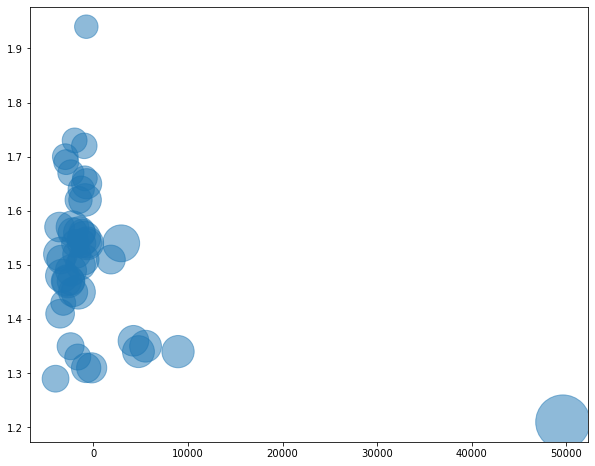

In [629]:
plt.figure(figsize=(10, 8))
plt.scatter(x=scatter[['net migration']], y=scatter[['fertility']], s=((scatter['Prefectural income per person'])/100)**2, alpha=0.5, )

In [630]:
scatter.to_csv('scatter.csv',index=False)